In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [4]:
# find and read clinical data and mouse drug data files. Create dataframes from each file
ct_df = pd.read_csv('Pymaceuticals/data/clinicaltrial_data.csv')
md_df = pd.read_csv('Pymaceuticals/data/mouse_drug_data.csv')

In [5]:
# read and understand clinical trial data frame
ct_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [6]:
ct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
Mouse ID              1893 non-null object
Timepoint             1893 non-null int64
Tumor Volume (mm3)    1893 non-null float64
Metastatic Sites      1893 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


# The clinical trial data from contains information on Mouse ID, Timepoint at which the tumor volume was measured, the tumor volume, and number of meta static sites.

In [7]:
# read and understand mouse drug data frame
md_df

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn
...,...,...
245,i669,Placebo
246,r850,Placebo
247,a262,Placebo
248,q787,Placebo


In [8]:
md_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
Mouse ID    250 non-null object
Drug        250 non-null object
dtypes: object(2)
memory usage: 4.0+ KB


# The mouse drug data frame provides information about which drug was provided to which mouse

In [9]:
# I want to merge both data frames to create a complete table of all important information.
complete_df = ct_df.merge(md_df, on='Mouse ID')
complete_df.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


In [10]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 0 to 1905
Data columns (total 5 columns):
Mouse ID              1906 non-null object
Timepoint             1906 non-null int64
Tumor Volume (mm3)    1906 non-null float64
Metastatic Sites      1906 non-null int64
Drug                  1906 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 89.3+ KB


# Initial observations show that not every mouse lived through the entire experiment. For example, mouse f932 died within the first five days. Also, g107 died within the 30-35 day range of the experiment. Each trial lasts 45 days.

In [11]:
# from complete_df create another data frame of tumor size, timepoint and drug

# tumorV_df = complete_df[['Drug', 'Timepoint', 'Tumor Volume (mm3)']].copy()
# tumorV_df

In [12]:
# tumorV_df = tumorV_df.set_index('Timepoint')

In [13]:
# tumorV_df.head(20)

In [14]:
complete_df.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


In [15]:
# I want to find the avg tumor volume at each time point per drug
grouped_mean_df = complete_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
grouped_mean_df.head(20)

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
           25           39.939528
           30           38.769339
           35           37.816839
           40           36.958001
           45           36.236114
Ceftamin   0            45.000000
           5            46.503051
           10           48.285125
           15           50.094055
           20           52.157049
           25           54.287674
           30           56.769517
           35           58.827548
           40           61.467895
           45           64.132421
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# I want to convert timepoint index into timepoint column. Do the same thing with drug index

grouped_mean_df = grouped_mean_df.reset_index()
grouped_mean_df.head(20)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [17]:
# pivot dataframe on drugs, set the index to timpoint, and values to Tumor Volume
pivoted_mean_df = grouped_mean_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
pivoted_mean_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [18]:
# I want to find the standard error of mean for each calculated avg tumor volume
grouped_sem_df = complete_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()
grouped_sem_df.head(20)

Drug       Timepoint
Capomulin  0            0.000000
           5            0.448593
           10           0.702684
           15           0.838617
           20           0.909731
           25           0.881642
           30           0.934460
           35           1.052241
           40           1.223608
           45           1.223977
Ceftamin   0            0.000000
           5            0.164505
           10           0.236144
           15           0.332053
           20           0.359482
           25           0.439356
           30           0.490620
           35           0.692248
           40           0.708505
           45           0.902358
Name: Tumor Volume (mm3), dtype: float64

In [19]:
# I want to convert timepoint index into timepoint column. Do the same thing with drug index

grouped_sem_df = grouped_sem_df.reset_index()
grouped_sem_df.head(20)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [20]:
# pivot dataframe on drugs, set the index to timpoint, and values to Tumor Volume
pivoted_sem_df = grouped_sem_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
pivoted_sem_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

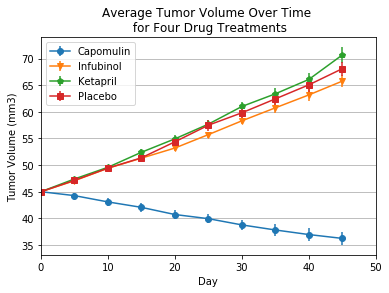

In [21]:
plt.figure(1)

a = pivoted_mean_df.index
b = pivoted_mean_df['Capomulin']
c = pivoted_mean_df['Infubinol']
d = pivoted_mean_df['Ketapril']
e = pivoted_mean_df['Placebo']

f = pivoted_sem_df['Capomulin']
g = pivoted_sem_df['Infubinol']
h = pivoted_sem_df['Ketapril']
i = pivoted_sem_df['Placebo']

plt.errorbar(a, b, yerr=f, marker='o', label='Capomulin')
plt.errorbar(a, c, yerr=g, marker='v', label='Infubinol')
plt.errorbar(a, d, yerr=h, marker='p', label='Ketapril')
plt.errorbar(a, e, yerr=i, marker='s', label='Placebo')

plt.legend()

plt.xlabel('Day')
plt.xlim(0, 50)
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume Over Time \n for Four Drug Treatments')

plt.grid(axis='y')

plt.tight_layout

# Repeat this process for to analyze Metastatic Sites

In [22]:
complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [23]:
# I want to find the avg metastatic sites (ms) at each time point per drug
ms_mean_df = complete_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()

In [24]:
# reset index
ms_mean_df = ms_mean_df.reset_index()

In [25]:
# pivot table to view number of avg number of metastatic sites by timepoint and drug
ms_df = ms_mean_df.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']
ms_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [26]:
# I want to find the standard error of mean of each calculated avg number metastatic sites
ms_sem_df = complete_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()

In [27]:
ms_sem_df = ms_sem_df.reset_index()

In [28]:
sem_df = ms_sem_df.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']
sem_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

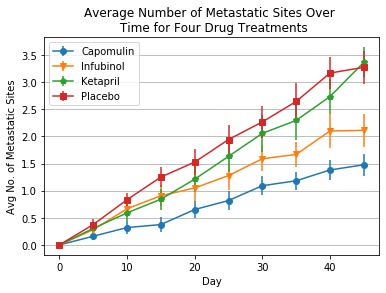

In [29]:
plt.figure(2)

a = ms_df.index
b = ms_df['Capomulin']
c = ms_df['Infubinol']
d = ms_df['Ketapril']
e = ms_df['Placebo']

f = sem_df['Capomulin']
g = sem_df['Infubinol']
h = sem_df['Ketapril']
i = sem_df['Placebo']

plt.errorbar(a, b, yerr=f, marker='o', label='Capomulin')
plt.errorbar(a, c, yerr=g, marker='v', label='Infubinol')
plt.errorbar(a, d, yerr=h, marker='p', label='Ketapril')
plt.errorbar(a, e, yerr=i, marker='s', label='Placebo')

plt.legend()

plt.xlabel('Day')
plt.ylabel('Avg No. of Metastatic Sites')
plt.title('Average Number of Metastatic Sites Over \n Time for Four Drug Treatments')
plt.grid(axis='y')

plt.tight_layout

# Analyze the survival rates of mice for each dru

In [30]:
complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [31]:
# I want to find the number of mice administered with each drug at each time point
count_df = complete_df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()

In [32]:
# reset index and change column name Mouse ID to Mouse Count
count_df = count_df.reset_index()

In [33]:
count_df = count_df.rename(columns = {'Mouse ID':'Mouse Count'})
count_df.head(20)

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [34]:
# pivot values so that timepoint is index, drugs are the columns and the number of mice are the values
sr1_df = count_df.pivot(index='Timepoint', columns='Drug')['Mouse Count']
sr1_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [35]:
# create an array of initial number of mice for each drug administered
int_mice_s = np.array([25, 25, 25, 25, 25, 25, 26, 25, 26, 25])
int_mice_s

array([25, 25, 25, 25, 25, 25, 26, 25, 26, 25])

In [36]:
# Subtract the intial number of mice at each time point in the study to determine 
# how many mice died since the begining of the study
sr2_df = sr1_df.sub(int_mice_s, axis='columns')
sr2_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0
5,0,-4,0,-2,-2,-1,-1,0,-1,-1
10,0,-5,-4,-3,-4,-1,-3,-1,-3,-3
15,-1,-6,-4,-6,-4,-5,-9,-1,-3,-4
20,-2,-7,-5,-6,-5,-6,-9,-2,-5,-8
25,-3,-7,-7,-6,-7,-8,-12,-2,-7,-9
30,-3,-9,-8,-7,-10,-10,-13,-2,-8,-10
35,-3,-11,-13,-8,-10,-11,-16,-4,-10,-11
40,-4,-11,-15,-10,-10,-13,-17,-5,-14,-11


In [37]:
# determine percent that have died
sr2_df = sr2_df.div(int_mice_s) * 100
sr2_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
5,0.0,-16.0,0.0,-8.0,-8.0,-4.0,-3.846154,0.0,-3.846154,-4.0
10,0.0,-20.0,-16.0,-12.0,-16.0,-4.0,-11.538462,-4.0,-11.538462,-12.0
15,-4.0,-24.0,-16.0,-24.0,-16.0,-20.0,-34.615385,-4.0,-11.538462,-16.0
20,-8.0,-28.0,-20.0,-24.0,-20.0,-24.0,-34.615385,-8.0,-19.230769,-32.0
25,-12.0,-28.0,-28.0,-24.0,-28.0,-32.0,-46.153846,-8.0,-26.923077,-36.0
30,-12.0,-36.0,-32.0,-28.0,-40.0,-40.0,-50.000000,-8.0,-30.769231,-40.0
35,-12.0,-44.0,-52.0,-32.0,-40.0,-44.0,-61.538462,-16.0,-38.461538,-44.0
40,-16.0,-44.0,-60.0,-40.0,-40.0,-52.0,-65.384615,-20.0,-53.846154,-44.0


In [38]:
# we want survival rate but the above dataframe shows the percent that died. Subtract the whole data from by 100
sr2_df = 100 + sr2_df
sr2_df

# I added 100 because the values in the above df are negative. i.e they have already been subtrated

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

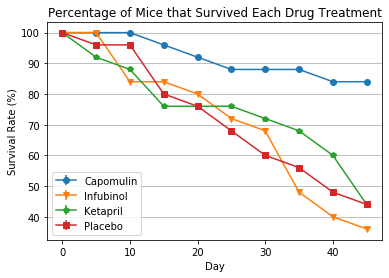

In [39]:
plt.figure(3)

a = sr2_df.index
b = sr2_df['Capomulin']
c = sr2_df['Infubinol']
d = sr2_df['Ketapril']
e = sr2_df['Placebo']


plt.errorbar(a, b, yerr=f, marker='o', label='Capomulin')
plt.errorbar(a, c, yerr=g, marker='v', label='Infubinol')
plt.errorbar(a, d, yerr=h, marker='p', label='Ketapril')
plt.errorbar(a, e, yerr=i, marker='s', label='Placebo')

plt.legend()

plt.xlabel('Day')
plt.ylabel('Survival Rate (%)')
plt.title('Percentage of Mice that Survived Each Drug Treatment')

plt.grid(axis='y')

plt.tight_layout

# Analyze Change in Tumor Volume Over 45 Days

In [40]:
# Look at pivoted_mean_df to look at data for tumor growth
pivoted_mean_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [41]:
# Subtract the timepoint 45 from timepoint 0 then divide by timepoint 0 and multiply by 100 to get percent
change_tumorV = round((pivoted_mean_df.loc[45].subtract(pivoted_mean_df.loc[0]))/pivoted_mean_df.loc[0]*100, 0)
change_tumorV

Drug
Capomulin   -19.0
Ceftamin     43.0
Infubinol    46.0
Ketapril     57.0
Naftisol     54.0
Placebo      51.0
Propriva     47.0
Ramicane    -22.0
Stelasyn     52.0
Zoniferol    47.0
dtype: float64

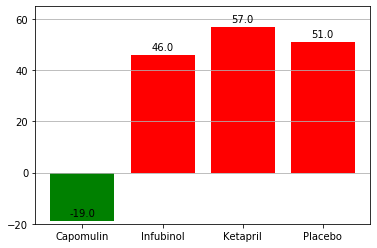

In [157]:
success = (['Capomulin'])
suc_change = (-19.0)

failed = ('Infubinol', 'Ketapril', 'Placebo')
fail_change = (46.0, 57.0, 51.0)

total_drugs = ('Capomulin', 'Infubinol', 'Ketapril', 'Placebo')

x1 = [0]
x2 = [1, 2, 3]

# x1 = np.arange(len(success))
# x2 = np.arange(len(failed))
x3 = np.arange(len(total_drugs))

fig, ax = plt.subplots()
rects1 = ax.bar(x1, suc_change, color='green')
rects2 = ax.bar(x2, fail_change, color='red')

ax.set_xticks(x3)
ax.set_xticklabels(total_drugs)

ax.set_yticks([-20, 0, 20, 40, 60])
ax.set_ylim(-20, 65)
ax.yaxis.grid()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


plt.show()
